In [6]:
import numpy as np
from numpy import newaxis
import random
import matplotlib.pyplot as plt
from sklearn import neighbors
import os
import scipy.io.wavfile
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
global num_fcc_frames
global num_ceps
global min_length_secs

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

num_fcc_frames = 50
num_ceps = 12
min_length_secs = .5
path = os.getcwd()

# Load Data from File

In [7]:
Clymene_Dolphin = np.load(path + '/NumpyArrays/Clymene_Dolphin.npy')
Common_Dolphin = np.load(path + '/NumpyArrays/Common_Dolphin.npy')
False_Killer_Whale = np.load(path + '/NumpyArrays/False_Killer_Whale.npy')
Melon_Headed_Whale = np.load(path + '/NumpyArrays/Melon_Headed_Whale.npy')
Panatropical_Spotted_Dolphin = np.load(path + '/NumpyArrays/Panatropical_Spotted_Dolphin.npy')
Rissos_Dolphin = np.load(path + '/NumpyArrays/Rissos_Dolphin.npy')
Short_Finned_Pilot_Whale = np.load(path + '/NumpyArrays/Short_Finned_Pilot_Whale.npy')
Sperm_Whale = np.load(path + '/NumpyArrays/Sperm_Whale.npy')
Spinner_Dolphin = np.load(path + '/NumpyArrays/Spinner_Dolphin.npy')
Striped_Dolphin = np.load(path + '/NumpyArrays/Striped_Dolphin.npy')
White_sided_Dolphin = np.load(path + '/NumpyArrays/White_sided_Dolphin.npy')
Bottlenose_Dolphin = np.load(path + '/NumpyArrays/Bottlenose_Dolphin.npy')

names = []
names.append('Bottlenose_Dolphin')
names.append('Common_Dolphin')
names.append('False_Killer_Whale')
names.append('Melon_Headed_Whale')
names.append('Panatropical_Spotted_Dolphin')
names.append('Rissos_Dolphin')
names.append('Short_Finned_Pilot_Whale')
names.append('Sperm_Whale')
names.append('Spinner_Dolphin')
names.append('Striped_Dolphin')
names.append('White_sided_Dolphin')
names.append('Clymene_Dolphin')

# Creating Feature Matrix and Label Vector

In [8]:
# Below is the Feature matrix as gathered from the Numpy Arrays folder
# Each row corresponds to a single entry, with 600 features (MFCC) that were gathered from a single audio file
# In more lamens terms, each row is a single whistle from an animal, that is going to be labeled by Y !

X = np.concatenate((Bottlenose_Dolphin,Common_Dolphin))
X = np.concatenate((X,False_Killer_Whale))
X = np.concatenate((X,Melon_Headed_Whale))
X = np.concatenate((X,Panatropical_Spotted_Dolphin))
X = np.concatenate((X,Rissos_Dolphin))
X = np.concatenate((X,Short_Finned_Pilot_Whale))
X = np.concatenate((X,Sperm_Whale))
X = np.concatenate((X,Spinner_Dolphin))
X = np.concatenate((X,Striped_Dolphin))
X = np.concatenate((X,White_sided_Dolphin))
X = np.concatenate((X,Clymene_Dolphin))

# I hate to use these magic numbers, but all I am doing below is creating a single vector, the Label vector,
# Label is equal to 1 when it is the specified animal, and 0 otherwise (as corresponds to the X matrix, or data matrix)

Y_Bottlenose = np.concatenate((np.ones(375,'F'),np.zeros(1990,'F')))
Y_Common = np.concatenate((np.zeros(375,'F'),np.ones(101,'F'),np.zeros(1889,'F')))
Y_False = np.concatenate((np.zeros(476,'F'),np.ones(108,'F'),np.zeros(1781,'F')))
Y_Melon = np.concatenate((np.zeros(584,'F'),np.ones(69,'F'),np.zeros(1712,'F')))
Y_Panatropical = np.concatenate((np.zeros(653,'F'),np.ones(378,'F'),np.zeros(1334,'F')))
Y_Rissos = np.concatenate((np.zeros(1031,'F'),np.ones(112,'F'),np.zeros(1222,'F')))
Y_Short = np.concatenate((np.zeros(1143,'F'),np.ones(147,'F'),np.zeros(1075,'F')))
Y_Sperm = np.concatenate((np.zeros(1290,'F'),np.ones(173,'F'),np.zeros(902,'F')))
Y_Spinner = np.concatenate((np.zeros(1463,'F'),np.ones(71,'F'),np.zeros(831,'F')))
Y_Striped = np.concatenate((np.zeros(1534,'F'),np.ones(171,'F'),np.zeros(660,'F')))
Y_White = np.concatenate((np.zeros(1705,'F'),np.ones(416,'F'),np.zeros(244,'F')))
Y_Clymene = np.concatenate((np.ones(2121,'F'),np.zeros(244,'F')))


# Parameter Estimation


### Number of Estimators for a Random Forest

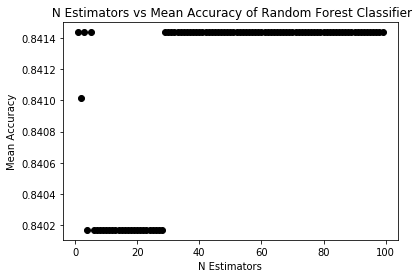

In [16]:
scores = []
l = list(range(1,100))
for i in range(1,100):
    pca = PCA(n_components = 1)  
    X_pca = pca.fit_transform(X)  
    clf = RandomForestClassifier(n_estimators=i, max_depth=2,random_state=0)
    score = cross_val_score(clf, X_pca, Y_Bottlenose.real, cv=3)
    scores.append(score.mean())
    
plt.plot(l,scores,'o', color='black')
plt.title(" N Estimators vs Mean Accuracy of Random Forest Classifier")
plt.xlabel("N Estimators")
plt.ylabel("Mean Accuracy")
plt.show()


# Final Results

In [17]:
pca = PCA(n_components = 1)  
X_pca = pca.fit_transform(X)  
clf = RandomForestClassifier(n_estimators=50, max_depth=2,random_state=0)
score = cross_val_score(clf, X_pca, Y_Bottlenose.real, cv=3)
print("K-NN Classifier Accuracy for Bottlenose Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Common.real, cv=3)
print("K-NN Classifier Accuracy for Common Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_False.real, cv=3)
print("K-NN Classifier Accuracy for False Killer Whale vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Melon.real, cv=3)
print("K-NN Classifier Accuracy for Melon Headed Whale vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Panatropical.real, cv=3)
print("K-NN Classifier Accuracy for Panatropical Spotted Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Rissos.real, cv=3)
print("K-NN Classifier Accuracy for Rissos Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Short.real, cv=3)
print("K-NN Classifier Accuracy for Short Finned Pilot Whale vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Sperm.real, cv=3)
print("K-NN Classifier Accuracy for Sperm Whale vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Spinner.real, cv=3)
print("K-NN Classifier Accuracy for Spinner Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Spinner.real, cv=3)
print("K-NN Classifier Accuracy for Striped Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_White.real, cv=3)
print("K-NN Classifier Accuracy for White Sided Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score = cross_val_score(clf, X_pca, Y_Clymene.real, cv=3)
print("K-NN Classifier Accuracy for Clymene Dolphin vs All: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))



K-NN Classifier Accuracy for Bottlenose Dolphin vs All: 0.84 (+/- 0.00)
K-NN Classifier Accuracy for Common Dolphin vs All: 0.96 (+/- 0.00)
K-NN Classifier Accuracy for False Killer Whale vs All: 0.95 (+/- 0.00)
K-NN Classifier Accuracy for Melon Headed Whale vs All: 0.97 (+/- 0.00)
K-NN Classifier Accuracy for Panatropical Spotted Dolphin vs All: 0.84 (+/- 0.00)
K-NN Classifier Accuracy for Rissos Dolphin vs All: 0.95 (+/- 0.00)
K-NN Classifier Accuracy for Short Finned Pilot Whale vs All: 0.94 (+/- 0.00)
K-NN Classifier Accuracy for Sperm Whale vs All: 0.93 (+/- 0.00)
K-NN Classifier Accuracy for Spinner Dolphin vs All: 0.97 (+/- 0.00)
K-NN Classifier Accuracy for Striped Dolphin vs All: 0.97 (+/- 0.00)
K-NN Classifier Accuracy for White Sided Dolphin vs All: 0.82 (+/- 0.02)
K-NN Classifier Accuracy for Clymene Dolphin vs All: 0.88 (+/- 0.04)


| Species vs All | Mean Accuracy of Random Forest |
|------|------|
|   Bottlenose Dolphin  | 84% |
|   Common Dolphin  | 96% |
|   False Killer Whale   | 95% |
|   Melon Headed Whale | 97% |
|   Panatropical Spotted Dolphin  | 84% |
|    Rissos Dolphin  | 95% |
|   Short Finned Pilot Whale  | 94% |
|   Sperm Whale  | 93% |
|   Spinner Dolphin  | 97% |
|   Striped Dolphin  | 97% |
|   White Sided Dolphin  | 82% |
|   Clymene Dolphin  | 88% |


### Hmm not any better than KNN .. lets try one more
